In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
X = df[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
y = df['Temperature (C)']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (77162, 3)
Test samples: (19291, 3)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
model = SGDRegressor(
    max_iter=1,
    tol=None,
    random_state=42,
    warm_start=True
)

epochs = 5
for epoch in range(epochs):
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print(f"Epoch {epoch + 1}/{epochs} - Train MSE: {mse_train:.2f}")

Epoch 1/5 - Train MSE: 52.93
Epoch 2/5 - Train MSE: 52.93
Epoch 3/5 - Train MSE: 52.93
Epoch 4/5 - Train MSE: 52.93
Epoch 5/5 - Train MSE: 52.93


In [23]:
print("Intercept:",model.intercept_)
print("coefficient",model.coef_)

Intercept: [11.87421405]
coefficient [-6.47516609 -1.12409279 -0.22135171]


In [24]:
y_pred = model.predict(X_test_scaled)

In [25]:
y_pred

array([18.22798082,  8.09208665, 14.60946093, ..., 18.82009605,
       17.60197536, 15.75988242])

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 5.946074461153638
MSE: 54.045334618990836
RMSE: 7.351553211328259
R2 Score: 0.4135659756742365


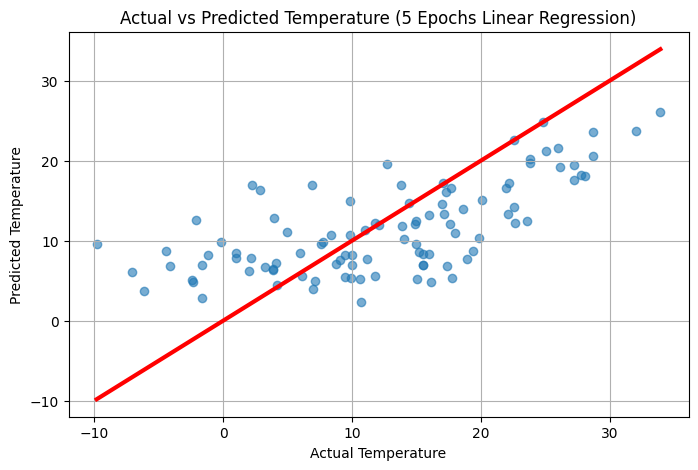

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.6)

min_val = min(min(y_test[:100]), min(y_pred[:100]))
max_val = max(max(y_test[:100]), max(y_pred[:100]))

plt.plot([min_val, max_val], [min_val, max_val], linewidth=3, color='red')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature (5 Epochs Linear Regression)")
plt.grid(True)
plt.show()

In [14]:
new_data = pd.DataFrame({
    "Humidity": [0.70],
    "Wind Speed (km/h)": [12],
    "Pressure (millibars)": [1010]
})

new_data_scaled = scaler.transform(new_data)
temp_pred = model.predict(new_data_scaled)

print("Predicted Temperature:", temp_pred[0])

Predicted Temperature: 12.866318361081776
